# ✅  〰️  **Python para Finanzas**  〰️  ✅ 
📊 


<img src="diplomado-inversiones-financieras-min-1.jpeg">

## 1) **Funcion Portafolio**

- Descargamos en el terminal los paquetes con **pip install "package"**
    
- Importamos librerias y le damos alias para simplicidad de uso

In [1126]:
import numpy as np
import pandas as pd
import scipy
import yfinance
import pandas_datareader
from matplotlib import pyplot as plt

- Definimos funcion con los parametros
- Creamos el algoritmo
- Retornamos los outputs deseables al momento de aplicar la funcion

In [1127]:
def portafolio(mu, s, w):
    mu_p = w.T @ mu # @ es para multiplicar matrices y .T es para transponer la matriz, para calcular el retorno
    mu_p2 = str(round(mu_p.item() * 100, 2)) + ' ' + '%' # Transformo el array en un string que muestre el numero como porcentaje y no un arreglo.
    
    sigma_p = np.sqrt(w.T @ s @ w) # sqrt es para sacar la raiz, para calcular la volatilidad
    sigma_p2 = str(round(sigma_p.item()* 100, 2)) + ' ' + '%' # Transformo el array en un string que muestre el numero como porcentaje y no un arreglo.
    
    return mu_p2, sigma_p2

In [1128]:
#Definimos cada matriz con su signo para intorducirlo en la formula

mu = np.array([.1, .07]).reshape(-1,1) # Array es para hacer operaciones matemática, reshape cambia la matriz
w = np.array([.2, .8]).reshape(-1,1) # El -1 quiere decir que la cantidad de filas que depende de la cantidad de numeros

s = np.array([
    [.13 ** 2, .004 ],
    [.004, .04 ** 2]]) # Hago una matriz entre las varianzas y covarianzas, haciendo una lista de dos listas

- Vemos las variables para asegurarnos de que los arrays esten bien y sean lo que necesitamos para luego usarlos como parametros

In [1129]:
mu

array([[0.1 ],
       [0.07]])

In [1130]:
w

array([[0.2],
       [0.8]])

In [1131]:
s

array([[0.0169, 0.004 ],
       [0.004 , 0.0016]])

- Llamamos a la funcion y le entregamos nuestras 3 variables que seran los parametros

In [1132]:
print(f" ✅ El retorno del portafolio y la volatilidad de este es 🟰 {portafolio(mu,s,w)}")

 ✅ El retorno del portafolio y la volatilidad de este es 🟰 ('7.6 %', '5.46 %')


## 2) **Recoleccion de Datos I**

- Importamos denuevo el package con api de YahooFinance para efecto explicativo del ejercicio

In [1133]:
import yfinance as yf

- Construimos la funcion con los parametros (stocks,start,end)

In [1134]:
def get_stock(stocks,start,end):
    
  pf = pd.DataFrame()

  for element in stocks:
    stock = yf.download(stocks, start, end)["Adj Close"]
    return stock

- Usamos la funcion y le damos los valores de los parametros para obtener el Dataframe con los precios historicos

In [1135]:
stocks_final = get_stock(["TSLA", "MARA", "LTMAQ", "T", "SQM"], "2019-01-01", "2022-11-01")
stocks_final

[*********************100%***********************]  5 of 5 completed


,LTMAQ,MARA,SQM,T,TSLA
Date,,,,,
2019-01-02,9.813571,1.52,31.817574,15.942032,20.674667
2019-01-03,9.635653,1.52,30.760294,15.963625,20.024000
2019-01-04,10.216228,1.60,32.247097,16.373779,21.179333
2019-01-07,10.487785,1.68,32.610538,16.670603,22.330667
2019-01-08,10.590791,1.72,33.783463,16.881073,22.356667
...,...,...,...,...,...
2022-10-25,0.441096,14.76,93.588333,17.690001,222.419998
2022-10-26,0.359739,13.79,94.197990,18.139999,224.639999
2022-10-27,0.324696,13.65,93.675430,18.030001,225.089996


In [1136]:
stocks_final.corr()

,LTMAQ,MARA,SQM,T,TSLA
LTMAQ,1.000000,-0.498202,-0.603487,0.349957,-0.816058
MARA,-0.498202,1.000000,0.392619,-0.174402,0.778765
SQM,-0.603487,0.392619,1.000000,-0.318642,0.752593
T,0.349957,-0.174402,-0.318642,1.000000,-0.306830
TSLA,-0.816058,0.778765,0.752593,-0.306830,1.000000


- Extra: Grafica para ver el comportamiento de precios

In [1137]:
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='Date'>

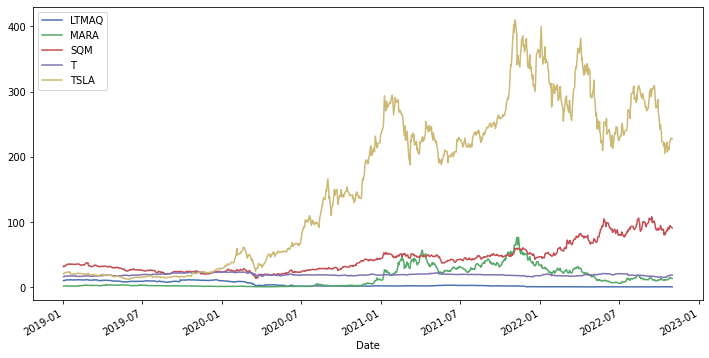

In [1138]:
stocks_final.plot(figsize=(12,6))

- Scatterplot para ver correlacion de precios

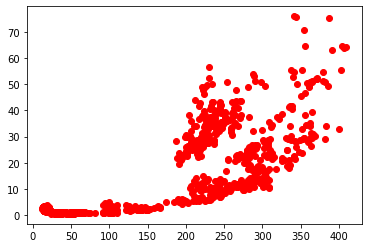

In [1139]:
plt.plot(stocks_final['TSLA'],stocks_final['MARA'],'ro')

## 3) **Recoleccion de Datos II**

- La funcion 'recommendations' de yfinance solamente puede contener un parametro de stocks /// **TypeError: recomendations() takes 1 positional argument but 5 were given** // **'DataFrame' object has no attribute 'recommendations'**

Opcion 1) Funcion que obtiene 1 stock como parametro y nos da las recomendaciones

In [1140]:
def recomendations(stock):

    pf = pd.DataFrame()
    stock = yf.Ticker(stock)
    target = stock.recommendations
        
    return target

- Llamamos a la funcion y le damos el parametro, nos retornara una serie de recomendaciones de diferentes firmas

In [1141]:
stocks_final = recomendations("TSLA")
stocks_final

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-16 07:42:00,JP Morgan,Overweight,,main
2012-02-16 13:53:00,Wunderlich,Hold,,down
2012-02-17 06:17:00,Oxen Group,Buy,,init
2012-03-26 07:31:00,Wunderlich,Buy,,up
2012-05-22 05:57:00,Maxim Group,Buy,,init
...,...,...,...,...
2022-10-20 13:26:44,Mizuho,Buy,,main
2022-10-25 12:50:21,Morgan Stanley,Overweight,,main
2022-11-23 11:21:03,Citigroup,Neutral,Sell,up


Opcion 2) Funcion que obtiene una lista de stocks y fechas de parametros y nos da las recomendaciones

In [1041]:
def recomendations2(stocks,start,end):

  for element in stocks:
    
    stock = yf.download(stocks, start, end)
    target = stock.recommendations
    
    return target

- Llamamos a la funcion y le damos el parametro

In [1142]:
stocks_final3 = recomendations2("TSLA", "2019-01-01", "2022-11-01")
stocks_final3

## 4) **Backtesting I** ----> Simulaciones con precios historicos de 10 años

#### - WORKFLOW // Veremos en primer lugar casos de portafolio de **Equal-weighted** y **Maximo Sharpe Ratio*** y luego desarrollaremos una estretegia para ir **balanceando** mensualmente nuestro portafolio

- Importacion con la API y vizualizacion de datos

- Descargamos 30 acciones y/o ETFs

In [1143]:
def get_stock(stocks,start,end):
    
  pf = pd.DataFrame()

  for element in stocks:
    stock = yf.download(stocks, start, end)["Adj Close"]
    return stock

- Llamamos a la funcion con sus parametros

In [1144]:
stocks_portafolio = get_stock(['AAPL','PYPL','AMZN','META','GOOG','TSLA','NFLX','NVDA','PYPL','CMCSA','ADBE','XOM','CME','PEP','LTMAQ','T','BA','CAT','CVX','KO','IBM','JNJ','JPM','MCD','MSFT','NKE','PG','VZ','WMT','DIS','V'], "2012-01-01", "2022-11-01")
stocks_portafolio

[*********************100%***********************]  30 of 30 completed


,AAPL,ADBE,AMZN,BA,CAT,CMCSA,CME,CVX,DIS,GOOG,...,NVDA,PEP,PG,PYPL,T,TSLA,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,12.519278,28.570000,8.951500,60.731083,69.344131,9.951447,31.135170,70.606483,34.300621,16.573130,...,3.221311,48.291279,48.218842,NaN,10.073393,1.872000,23.825237,24.031540,47.155350,54.916332
2012-01-04,12.586557,28.280001,8.875500,60.821091,69.986069,10.044868,30.549559,70.484962,34.784107,16.644611,...,3.258020,48.538551,48.197205,NaN,10.089969,1.847333,23.399576,23.717005,46.670731,54.929119
2012-01-05,12.726292,28.480000,8.880500,60.166492,70.480446,10.134230,30.246614,69.794037,35.366077,16.413727,...,3.375034,48.160366,47.995167,NaN,10.080021,1.808000,23.575394,23.553684,46.444061,54.763096
2012-01-06,12.859332,28.719999,9.130500,60.534725,70.657532,10.028619,29.661011,69.288658,35.733173,16.189817,...,3.336030,47.556728,47.879723,NaN,10.033559,1.794000,23.297792,23.486284,46.115784,54.354404
2012-01-09,12.838936,28.530001,8.928000,60.984745,71.646255,10.239836,28.930874,70.043526,35.589909,15.503389,...,3.336030,47.803997,48.081745,NaN,10.026798,1.816667,23.110409,23.510792,46.256474,54.597057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25,152.087708,323.790009,120.599998,146.649994,194.839996,31.559999,174.801147,173.587219,104.360001,104.930000,...,132.576080,177.164886,130.860001,89.239998,17.690001,222.419998,193.946503,36.430000,139.543961,105.034447
2022-10-26,149.102661,320.480011,115.660004,133.789993,196.960007,31.500000,170.953125,175.730637,104.629997,94.820000,...,128.927017,177.959930,131.779999,88.550003,18.139999,224.639999,202.876541,36.430000,140.609924,106.284386
2022-10-27,144.560196,318.649994,110.959999,139.759995,212.139999,31.969999,171.748581,176.534424,104.440002,92.599998,...,131.726288,177.771103,131.880005,87.349998,18.030001,225.089996,203.834396,36.180000,140.201462,106.691116


- Vizualizamos los precios de las acciones con pyplot

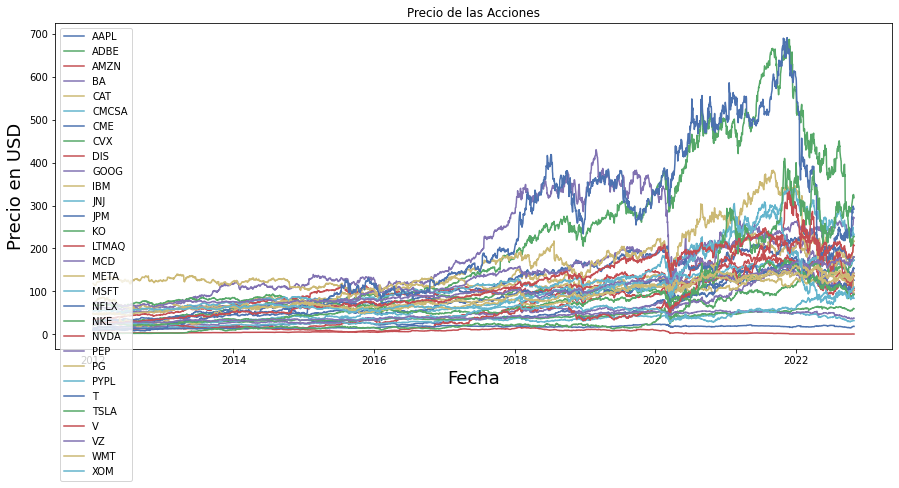

In [1145]:
plt.figure(figsize=(15,6)) 

for i in stocks_portafolio.columns.values: #Iteramos sobre el data frame y graficamos cada precio de las acciones
    
    plt.plot( stocks_portafolio[i],  label=i)
plt.title('Precio de las Acciones')

plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(stocks_portafolio.columns.values, loc='upper left') #Para descibir los elementos del grafico con simbologia

plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight') #Opcional: En caso de que queramos guardar la imagen para un posterior uso o analisis

plt.show()


 - Análisis explicativo utilizando la matriz de correlaciones

<AxesSubplot:>

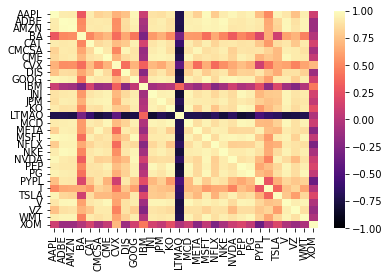

In [1146]:
import seaborn as sns #Para generar mejores graficos que pyplot

sns.heatmap(stocks_portafolio.corr(),cmap='magma',vmax=1,vmin=-1,xticklabels=1,yticklabels=1)

- Mejoramos y damos mas parametros al heatmap

<AxesSubplot:>

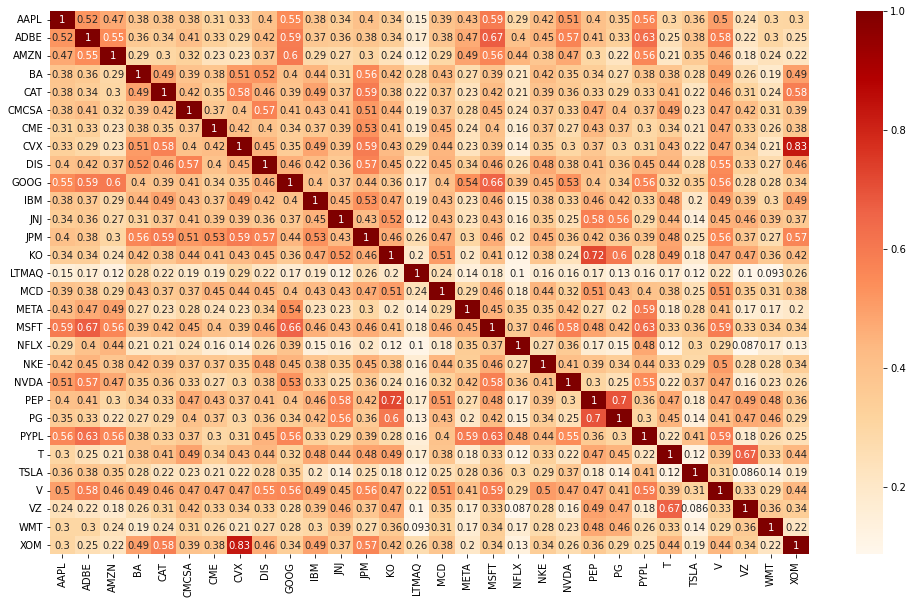

In [1147]:
returns = stocks_portafolio.pct_change() #Usando precios ajustados
fig, ax = plt.subplots(figsize = (17, 10))
sns.heatmap(returns.corr(),annot=True,cmap='OrRd')

- Como puede verse en la matriz de correlaciones, la mayoría de los valores están un altamente correlacionados, ya que se trata de acciones, en su mayoría, de empresas tecnológicas. Y otras que no son podemos ver que la correlacion es menor.

- Rentabilidad Logaritmica

In [1148]:
def retorno_log(stocks_portafolio):
  return np.log(stocks_portafolio) - np.log(stocks_portafolio.shift(1))

In [1149]:
log_retornos = retorno_log(stocks_portafolio)
log_retornos.dropna() #botamos valores nulos
log_retornos.sum()

AAPL     2.503730
ADBE     2.411265
AMZN     2.437456
BA       0.852956
CAT      1.138324
CMCSA    1.159860
CME      1.710988
CVX      0.933117
DIS      1.133357
GOOG     1.742509
IBM      0.142297
JNJ      1.273150
JPM      1.587387
KO       0.869825
LTMAQ   -4.304854
MCD      1.314734
META     0.890698
MSFT     2.377981
NFLX     3.342259
NKE      1.465163
NVDA     3.735008
PEP      1.318227
PG       1.027077
PYPL     0.822755
T        0.593171
TSLA     4.800319
V        2.160513
VZ       0.441501
WMT      1.100938
XOM      0.693988
dtype: float64

In [1150]:
log_retornos.sum().mean()

1.3891900610863785

In [1151]:
log_retono=np.log(stocks_portafolio/stocks_portafolio.shift(1))

In [1152]:
log_retono.mean()*250

AAPL     0.229700
ADBE     0.221217
AMZN     0.223620
BA       0.078253
CAT      0.104433
CMCSA    0.106409
CME      0.156971
CVX      0.085607
DIS      0.103978
GOOG     0.159863
IBM      0.013055
JNJ      0.116803
JPM      0.145632
KO       0.079800
LTMAQ   -0.394941
MCD      0.120618
META     0.084667
MSFT     0.218163
NFLX     0.306629
NKE      0.134419
NVDA     0.342661
PEP      0.120938
PG       0.094227
PYPL     0.111484
T        0.054419
TSLA     0.440396
V        0.198212
VZ       0.040505
WMT      0.101003
XOM      0.063669
dtype: float64

In [1153]:
log_retono.cov()*250

,AAPL,ADBE,AMZN,BA,CAT,CMCSA,CME,CVX,DIS,GOOG,...,NVDA,PEP,PG,PYPL,T,TSLA,V,VZ,WMT,XOM
AAPL,0.083179,0.046440,0.043864,0.042324,0.031092,0.026179,0.021923,0.026877,0.029350,0.041807,...,0.063196,0.020605,0.018113,0.064743,0.017961,0.058517,0.035592,0.012410,0.017196,0.022899
ADBE,0.046440,0.093416,0.053737,0.042623,0.029519,0.029585,0.024513,0.025439,0.032166,0.047994,...,0.075347,0.022160,0.017794,0.080645,0.015382,0.066191,0.043827,0.011759,0.018190,0.020487
AMZN,0.043864,0.053737,0.102352,0.036049,0.027237,0.024738,0.018303,0.020988,0.030443,0.050775,...,0.065739,0.016994,0.012884,0.070589,0.013928,0.064569,0.036447,0.010558,0.015479,0.018595
BA,0.042324,0.042623,0.036049,0.140360,0.051932,0.035192,0.035869,0.054419,0.049106,0.040204,...,0.057990,0.023308,0.018334,0.064846,0.029364,0.061430,0.045283,0.017600,0.014606,0.048215
CAT,0.031092,0.029519,0.027237,0.051932,0.079781,0.028449,0.023584,0.045530,0.032562,0.029064,...,0.044413,0.016318,0.014671,0.039382,0.024019,0.035378,0.032316,0.015516,0.013316,0.042621
CMCSA,0.026179,0.029585,0.024738,0.035192,0.028449,0.056367,0.021361,0.026815,0.034363,0.025591,...,0.034107,0.019758,0.016877,0.036866,0.023740,0.030933,0.027493,0.017499,0.014747,0.024216
CME,0.021923,0.024513,0.018303,0.035869,0.023584,0.021361,0.058823,0.029376,0.024288,0.022163,...,0.028614,0.018547,0.016102,0.029937,0.016826,0.030208,0.028321,0.014416,0.012849,0.024026
CVX,0.026877,0.025439,0.020988,0.054419,0.045530,0.026815,0.029376,0.079060,0.031880,0.026286,...,0.036184,0.018669,0.014946,0.037732,0.024685,0.036357,0.032850,0.016917,0.011943,0.060300
DIS,0.029350,0.032166,0.030443,0.049106,0.032562,0.034363,0.024288,0.031880,0.063041,0.030369,...,0.040886,0.018365,0.016075,0.048107,0.022811,0.040174,0.034116,0.014846,0.013877,0.029874
GOOG,0.041807,0.047994,0.050775,0.040204,0.029064,0.025591,0.022163,0.026286,0.030369,0.069213,...,0.060115,0.018607,0.016212,0.061080,0.017168,0.052407,0.036680,0.013052,0.014760,0.023253


### Equal-weighted Portafolio

Para simplificar, construiremos una cartera con la misma ponderación para las 30 empresas. Esto significa que invertiremos el 3.3% de nuestro dinero en cada una de todas las acciones.

In [1154]:
weights = np.full((30, 1), 0.03, dtype=float) #Creamos un np array con los pesos para luego ejecutar operaciones matematicas y asignarselos a cada empresa
weights #Asignamos pesos iguales a las acciones

array([[0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03],
       [0.03]])

- Calculamos el retorno esperado anual del portafolio

Ante error de las 2 siguientes celdas: Correr celdas desde arriba y cambiar el 31 del np.full por lo que diga el error (30 o 32) ---> ' weights = **np.full((31, 1)**, 0.05, dtype=float)'

In [1155]:
returns['Portfolio'] = np.dot(returns,weights)

portfolio_annual_return = returns['Portfolio'].mean()*250

print('Retorno esperado anual del portafolio es ' + str(np.round(portfolio_annual_return,2)*100)+'%')

Retorno esperado anual del portafolio es 15.0%


- Ahora vamos a calcular el riesgo de nuestra cartera.

In [1156]:
# covariance_matrix = returns.cov()*250 
# portfolio_var = np.dot(weights.T,np.dot(covariance_matrix,weights))
# portfolio_std = np.sqrt(portfolio_var)
# print('Desviacion estandar del portafolio es ' + str(np.round(portfolio_std[0,0],3)*100)+'%')

- Como sabemos, hay un equilibrio entre riesgo y rentabilidad. Construimos una cartera utilizando empresas tecnológicas que tienen alta rentabilidad y alto riesgo.

 -Ahora, averigüemos **cuánto ganaríamos** si invirtiéramos 1 $ en esta cartera en 2012-01-01.

Text(0, 0.5, 'Value')

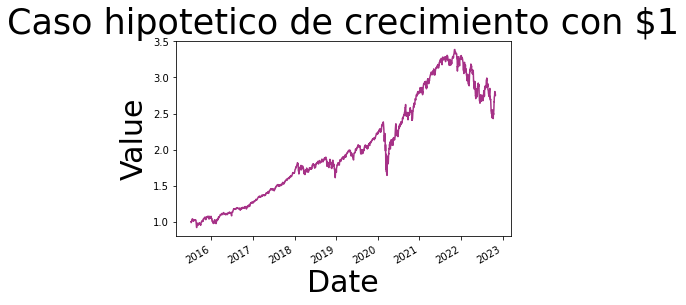

In [1157]:
cum_return = (1+returns).cumprod() # Devuelve el producto acumulativo de elementos a lo largo de un eje dado
cum_return.Portfolio.dropna().plot(color='#a63287')

#formatting
ax = plt.title("Caso hipotetico de crecimiento con $1",fontsize=35)

plt.xlabel('Date',fontsize=30)
plt.ylabel('Value',fontsize=30)

Si hubiese invirtió  1 usd en la cartera a principios de 2020. Usted tendría aproximadamente $ 2.8 a partir de fines de 2022

Hasta este punto, hemos constituido una cartera que tiene 30 empresas con la misma ponderación. Como último paso, analicemos la relación entre riesgo y rentabilidad de las acciones individuales y de nuestra cartera ponderada por igual.

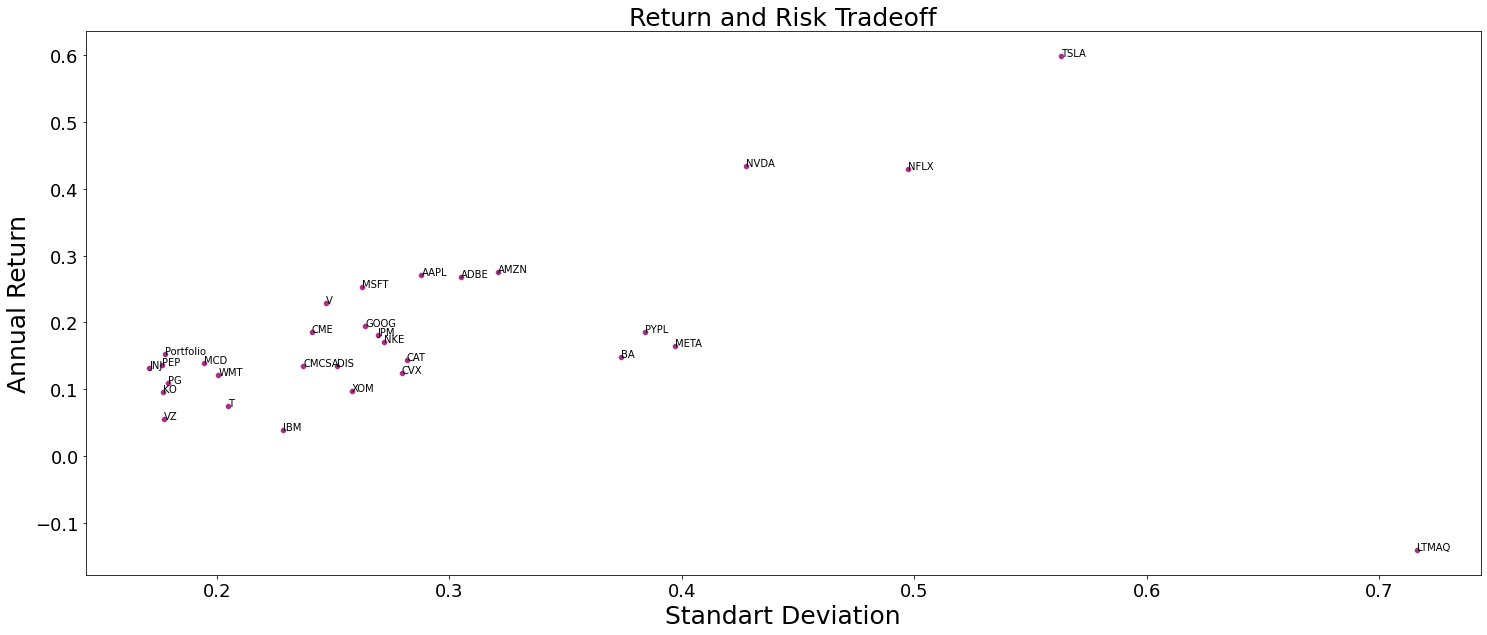

In [1158]:
df = pd.concat([returns.mean()*250,np.sqrt(250)*returns.std()],axis=1)

df.columns = ['returns', 'std']
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.scatterplot(x=df['std'],y=df['returns'],marker="o", color='#a63287')

for line in range(0,df.shape[0]):
     ax.text(df.iloc[line,1], df.iloc[line,0], df.index[line])
        
#formatting

plt.xlabel('Standart Deviation',size=25)
plt.title('Return and Risk Tradeoff',size=25)
plt.ylabel('Annual Return',size=25)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

- Como puede verse en el gráfico, nuestra cartera (punto con nonmbre portafolio), ponderada por igual, supera la rentabilidad anual de valores como Paypal, Netflix, Meta, Disney, J, entre otras, teniendo menos riesgo que ellos y mayor retorno.

- En conclusión, diversificando se puede reducir drásticamente tus riesgos sin reducir drásticamente tus rendimientos esperados.

### Portafolio Maximo Sharpe Ratio

- Sharpe Ratio

Es un indicador que medir la relación entre el riesgo y el beneficio Se Calcula como R/S , siendo R la rentabilidad y S la voltalidad. Nos interesa obtener Sharpe ratio alto ya que cuando mayor sea mejor relación beneficio riesgo

pip install PyPortfolioOpt en terminal

In [1159]:
import pandas as pd
from pandas_datareader import data as wb
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting 

In [1160]:
stocks_portafolio['Total'] = stocks_portafolio.sum(axis=1) #Creamos columna nueva en dataframe con las sumas

stocks_portafolio['Daily Return'] = stocks_portafolio['Total'].pct_change(1) #Creamos columna nueva en dataframe con los retornos diarios

sharpe_ratio = stocks_portafolio['Daily Return'].mean() / stocks_portafolio['Daily Return'].std() #Calculamos Ratios de Sharpe

sharpe_ratio

0.05338324142156022

- Este ratio suele ser una medida anual, por lo que vamos a multiplicarlo por la raíz cuadrada de 252 para obtener el ratio de Sharpe anualizado.

In [1161]:
ASR = (252**0.5) * sharpe_ratio # Sharpe Ratio anualizado

ASR

0.8474326858798231

### Portfolio Optimization

#### Monte Carlo Simulation para obtener mejor Ratio de Sharpe

Con el fin de simular miles de posibles asignaciones para nuestra simulación de Monte Carlo, utilizaremos algunas estadísticas, una de las cuales es la rentabilidad media diaria:

Comprobaremos un montón de asignaciones aleatorias y ver cuál tiene el **mejor ratio de Sharpe**.

Este proceso de adivinar al azar se conoce como Simulación de Montecarlo.

Lo que vamos a hacer es asignar aleatoriamente una ponderación a cada acción de nuestra cartera y, a continuación, calcular la rentabilidad media diaria y la desviación típica de la rentabilidad.

Esto nos permite calcular el Ratio de Sharpe para muchas asignaciones seleccionadas aleatoriamente.

A continuación, vamos a representar las asignaciones en un gráfico que muestre la rentabilidad frente a la volatilidad, coloreado por el Ratio de Sharpe.

Lo que buscamos es qué asignación aleatoria tiene el mejor ratio de Sharpe.

In [1162]:
stocks_portafolio.pct_change(1).mean()

AAPL            0.001085
ADBE            0.001072
AMZN            0.001100
BA              0.000593
CAT             0.000577
CMCSA           0.000538
CME             0.000745
CVX             0.000500
DIS             0.000542
GOOG            0.000778
IBM             0.000157
JNJ             0.000526
JPM             0.000727
KO              0.000382
LTMAQ          -0.000561
MCD             0.000558
META            0.000657
MSFT            0.001011
NFLX            0.001720
NKE             0.000685
NVDA            0.001735
PEP             0.000546
PG              0.000441
PYPL            0.000743
T               0.000302
TSLA            0.002393
V               0.000915
VZ              0.000225
WMT             0.000485
XOM             0.000388
Total           0.000610
Daily Return    0.704335
dtype: float64

Para el resto del ejercicio, vamos a pasar a utilizar rendimientos logarítmicos en lugar de rendimientos aritméticos.

La rentabilidad diaria aritmética sería:

In [1163]:
stocks_portafolio.pct_change(1).head()

,AAPL,ADBE,AMZN,BA,CAT,CMCSA,CME,CVX,DIS,GOOG,...,PG,PYPL,T,TSLA,V,VZ,WMT,XOM,Total,Daily Return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.010150,-0.008490,0.001482,0.009257,0.009388,-0.018809,-0.001721,0.014096,0.004313,...,-0.000449,NaN,0.001646,-0.013177,-0.017866,-0.013088,-0.010277,0.000233,0.001401,NaN
2012-01-05,0.011102,0.007072,0.000563,-0.010763,0.007064,0.008896,-0.009916,-0.009802,0.016731,-0.013871,...,-0.004192,NaN,-0.000986,-0.021292,0.007514,-0.006886,-0.004857,-0.003022,-0.001260,-1.899751
2012-01-06,0.010454,0.008427,0.028152,0.006120,0.002513,-0.010421,-0.019361,-0.007241,0.010380,-0.013642,...,-0.002405,NaN,-0.004609,-0.007743,-0.011775,-0.002862,-0.007068,-0.007463,-0.002309,0.832199
2012-01-09,-0.001586,-0.006616,-0.022178,0.007434,0.013993,0.021061,-0.024616,0.010895,-0.004009,-0.042399,...,0.004219,NaN,-0.000674,0.012635,-0.008043,0.001043,0.003051,0.004464,0.001209,-1.523792


Veamos cómo obtendríamos la rentabilidad media diaria logarítmica:

In [1164]:
log_return = np.log(stocks_portafolio/stocks_portafolio.shift(1))
log_return

,AAPL,ADBE,AMZN,BA,CAT,CMCSA,CME,CVX,DIS,GOOG,...,PG,PYPL,T,TSLA,V,VZ,WMT,XOM,Total,Daily Return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005360,-0.010202,-0.008526,0.001481,0.009215,0.009344,-0.018988,-0.001723,0.013997,0.004304,...,-0.000449,NaN,0.001644,-0.013264,-0.018027,-0.013175,-0.010330,0.000233,0.001400,NaN
2012-01-05,0.011041,0.007047,0.000563,-0.010821,0.007039,0.008857,-0.009966,-0.009851,0.016593,-0.013969,...,-0.004201,NaN,-0.000986,-0.021522,0.007486,-0.006910,-0.004869,-0.003027,-0.001261,NaN
2012-01-06,0.010400,0.008392,0.027763,0.006102,0.002509,-0.010476,-0.019551,-0.007267,0.010326,-0.013735,...,-0.002408,NaN,-0.004620,-0.007773,-0.011845,-0.002866,-0.007093,-0.007491,-0.002312,0.605517
2012-01-09,-0.001587,-0.006638,-0.022428,0.007407,0.013896,0.020843,-0.024924,0.010836,-0.004017,-0.043324,...,0.004210,NaN,-0.000674,0.012556,-0.008075,0.001043,0.003046,0.004454,0.001209,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25,0.019153,0.023657,0.006489,0.031870,0.018336,0.015326,0.021794,0.010343,0.025623,0.018856,...,0.011452,0.068641,0.010227,0.051525,0.019061,0.012707,0.004723,-0.006777,0.020199,1.025973
2022-10-26,-0.019822,-0.010275,-0.041824,-0.091777,0.010822,-0.001903,-0.022260,0.012272,0.002584,-0.101313,...,0.007006,-0.007762,0.025120,0.009932,0.045015,0.000000,0.007610,0.011830,-0.008168,NaN
2022-10-27,-0.030939,-0.005727,-0.041485,0.043655,0.074246,0.014810,0.004642,0.004564,-0.001818,-0.023691,...,0.000759,-0.013644,-0.006082,0.002001,0.004710,-0.006886,-0.002909,0.003820,-0.004430,-0.609999


A partir de ellas, podemos ver lo próximos que están los rendimientos aritméticos y logarítmicos, pero los rendimientos logarítmicos son un poco más convenientes para algunas técnicas de análisis.

Antes de ejecutar miles de asignaciones aleatorias, vamos a hacer una única asignación aleatoria. Para ello vamos a:

- Establecer nuestros pesos a una matriz aleatoria NumPy
- Reequilibrar los pesos para que sumen uno
- Calcular la rentabilidad esperada de la cartera
- Calcular la volatilidad esperada de la cartera
- Calcular el ratio de Sharpe

In [1165]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks_portafolio.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(32)) 
    weights = weights/np.sum(weights) 

    # guardar los weights
    all_weights[ind,:] = weights

    # retorno esperado
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # volatibilidad esperada 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [1166]:
sharpe_arr.max()

0.9074151715620764

Ahora vamos a repetir el proceso anterior miles de veces.

Para ello vamos a:

- Deshacerse de las declaraciones de impresión
- Establecer el número de carteras a simular - en este caso num_ports = 5000
- Crear un array all_weights para almacenar todos los pesos y poder guardarlos.
- Crear una matriz para contener todos los retornos ret_arr
- Crear una matriz para contener todas las medidas de volatilidad vol_arr
- Crear una matriz con los ratios de Sharpe que calculamos sharpe_arr
- Poner el código restante en un bucle for


In [1167]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks_portafolio.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(32)) 
    weights = weights/np.sum(weights)  

    # Guadar los weights
    all_weights[ind,:] = weights

    # retorno esperado
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # volatibilidad esperada 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


Veamos ahora el Ratio de Sharpe máximo que hemos obtenido:

In [1189]:
sharpe_arr.max()

0.8876564691285909

Si a continuación obtenemos la ubicación del máximo Sharpe Ratio y luego obtenemos la asignación para ese índice. Esto nos muestra la asignación óptima de las 5000 asignaciones aleatorias:

In [1190]:
sharpe_arr.argmax()

1475

In [1191]:
all_weights[4988,:]

array([0.01857697, 0.03829606, 0.02194156, 0.03733072, 0.02887716,
       0.0035584 , 0.06145845, 0.03599314, 0.04524819, 0.00802557,
       0.04528495, 0.00074724, 0.043465  , 0.01884702, 0.02404502,
       0.02856568, 0.03482092, 0.01237328, 0.03250727, 0.05295337,
       0.06159083, 0.05820559, 0.04599468, 0.02346862, 0.00373522,
       0.01938448, 0.03971275, 0.01416168, 0.05733838, 0.05158339,
       0.0164591 , 0.01544931])

Ahora vamos a trazar los datos, vamos a utilizar la funcionalidad de dispersión de Matplotlib y pasar en la matriz de volatilidad, la matriz de retorno, y el color por el ratio de Sharpe:

Text(0, 0.5, 'Return')

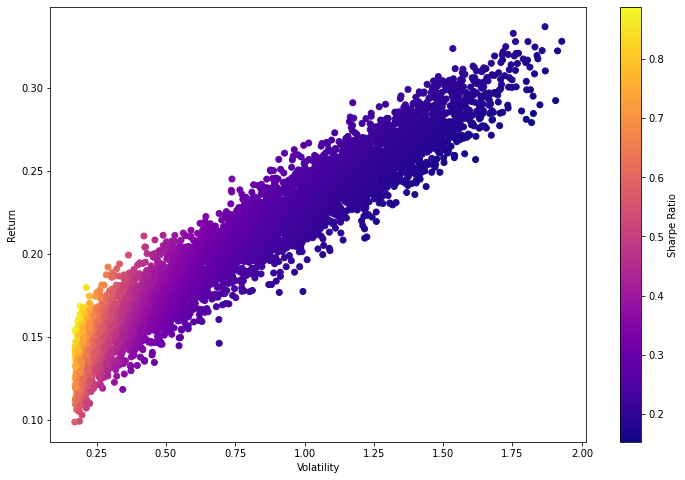

In [1192]:
# plot the data

plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [1193]:
max_sr_ret = ret_arr[4988]
max_sr_vol = vol_arr[4988]

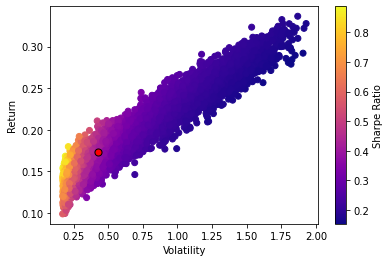

In [1194]:
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# agregamos el punto rojo para max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')

- Los resultados óptimos se almacenan en la matriz x, así que llamamos a opt_results.x, y con get_ret_vol_sr(opt_results.x) podemos ver que el resultado óptimo que podemos obtener es un Sharpe Ratio de (Primer valor del array resultado).

- Frontera eficiente / Min volatibilidad

In [1195]:
mu = expected_returns.mean_historical_return(stocks_portafolio)
S = risk_models.sample_cov(stocks_portafolio)
S

,AAPL,ADBE,AMZN,BA,CAT,CMCSA,CME,CVX,DIS,GOOG,...,PG,PYPL,T,TSLA,V,VZ,WMT,XOM,Total,Daily Return
AAPL,0.083643,0.046474,0.044043,0.041761,0.031126,0.026277,0.021655,0.026801,0.029428,0.041923,...,0.018270,0.065153,0.018009,0.058229,0.035810,0.012488,0.017327,0.022762,0.035560,0.426775
ADBE,0.046474,0.093800,0.053907,0.041599,0.029497,0.029857,0.024202,0.024960,0.032203,0.048066,...,0.018043,0.080849,0.015470,0.065474,0.043947,0.011858,0.018451,0.020115,0.042462,-6.739211
AMZN,0.044043,0.053907,0.103770,0.035436,0.027279,0.024784,0.018218,0.020917,0.030362,0.051151,...,0.012880,0.070817,0.013894,0.064574,0.036512,0.010572,0.015563,0.018459,0.037473,-2.890796
BA,0.041761,0.041599,0.035436,0.140801,0.051949,0.034852,0.034625,0.053769,0.049166,0.039569,...,0.017985,0.064121,0.029207,0.059797,0.045196,0.017422,0.014181,0.048128,0.043072,-6.682833
CAT,0.031126,0.029497,0.027279,0.051949,0.080023,0.028556,0.023603,0.045822,0.032670,0.029080,...,0.014740,0.039470,0.024028,0.035123,0.032419,0.015597,0.013508,0.042776,0.030448,0.574680
CMCSA,0.026277,0.029857,0.024784,0.034852,0.028556,0.056665,0.021315,0.026737,0.034513,0.025664,...,0.017083,0.037038,0.023858,0.030405,0.027656,0.017662,0.014928,0.024241,0.025617,-2.172425
CME,0.021655,0.024202,0.018218,0.034625,0.023603,0.021315,0.058482,0.028608,0.024251,0.021933,...,0.016094,0.029618,0.016704,0.029267,0.028089,0.014399,0.012855,0.023804,0.023841,-1.600887
CVX,0.026801,0.024960,0.020917,0.053769,0.045822,0.026737,0.028608,0.078787,0.032204,0.026264,...,0.015129,0.037792,0.024740,0.035391,0.032959,0.017016,0.012044,0.060498,0.028872,-3.205651
DIS,0.029428,0.032203,0.030362,0.049166,0.032670,0.034513,0.024251,0.032204,0.063905,0.030491,...,0.016129,0.048535,0.022802,0.040041,0.034479,0.014855,0.013854,0.030006,0.030090,-5.604095
GOOG,0.041923,0.048066,0.051151,0.039569,0.029080,0.025664,0.021933,0.026264,0.030491,0.070142,...,0.016356,0.061775,0.017205,0.052169,0.036869,0.013105,0.014821,0.023226,0.034890,-1.753313


In [1196]:
mu

AAPL            0.260537
ADBE            0.249804
AMZN            0.252835
BA              0.082073
CAT             0.111009
CMCSA           0.113224
CME             0.171432
CVX             0.090124
DIS             0.110499
GOOG            0.174852
IBM             0.013246
JNJ             0.124948
JPM             0.158119
KO              0.083763
LTMAQ          -0.328405
MCD             0.129283
META            0.089092
MSFT            0.245963
NFLX            0.362174
NKE             0.145102
NVDA            0.412559
PEP             0.129648
PG              0.099638
PYPL            0.118934
T               0.056387
TSLA            0.558805
V               0.221156
VZ              0.041674
WMT             0.107175
XOM             0.066282
Total           0.146927
Daily Return         NaN
dtype: float64

In [1197]:
print("La rentabilidad esperada es en %")
print(mu * 100)

La rentabilidad esperada es en %
AAPL            26.053678
ADBE            24.980399
AMZN            25.283476
BA               8.207329
CAT             11.100931
CMCSA           11.322412
CME             17.143226
CVX              9.012448
DIS             11.049908
GOOG            17.485191
IBM              1.324621
JNJ             12.494845
JPM             15.811874
KO               8.376261
LTMAQ          -32.840531
MCD             12.928275
META             8.909213
MSFT            24.596293
NFLX            36.217448
NKE             14.510229
NVDA            41.255852
PEP             12.964763
PG               9.963808
PYPL            11.893384
T                5.638712
TSLA            55.880480
V               22.115598
VZ               4.167368
WMT             10.717478
XOM              6.628217
Total           14.692706
Daily Return          NaN
dtype: float64


- EfficientFrontier

In [1198]:
ef = EfficientFrontier(mu, S)
weights = ef.min_volatility()
ef.portfolio_performance(verbose=True)

Expected annual return: nan%
Annual volatility: 13.3%
Sharpe Ratio: nan


(nan, 0.1325606586784348, nan)

### Estrategia de balanceo de los portafolios mensual

En inversión, el reequilibrio es un enfoque para reasignar periódicamente nuestros activos en una cartera de inversión. Con ello se pretende mantener en el tiempo el nivel de riesgo deseado en función de nuestra tolerancia individual al riesgo y nuestros objetivos de inversión.

- Importamos la data

In [1199]:
tickers = ['AAPL','PYPL','AMZN','META','GOOG','TSLA',
           'NFLX','NVDA','PYPL','CMCSA','ADBE','XOM',
           'CME','PEP','LTMAQ','T','BA','CAT','CVX',
           'KO','IBM','JNJ','JPM','MCD','MSFT','NKE',
           'PG','VZ','WMT','DIS','V']

stock_data = yf.download(tickers,start='2012-01-1', end='2022-11-01',interval='1mo')
stock_data = stock_data.dropna()     

sp500 = yf.download("^GSPC",start='2012-01-1', end='2022-11-01',interval='1mo')
sp500

[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-01,1258.859985,1333.469971,1258.859985,1312.410034,1312.410034,79567560000
2012-02-01,1312.449951,1378.040039,1312.449951,1365.680054,1365.680054,78385710000
2012-03-01,1365.900024,1419.150024,1340.030029,1408.469971,1408.469971,83899660000
2012-04-01,1408.469971,1422.380005,1357.380005,1397.910034,1397.910034,74761710000
2012-05-01,1397.859985,1415.319946,1291.979980,1310.329956,1310.329956,86920490000
...,...,...,...,...,...,...
2022-06-01,4149.779785,4177.509766,3636.870117,3785.379883,3785.379883,106116710000
2022-07-01,3781.000000,4140.149902,3721.560059,4130.290039,4130.290039,81688320000
2022-08-01,4112.379883,4325.279785,3954.530029,3955.000000,3955.000000,92252350000


- Creamos un dataframe que contiene los rendimientos mensuales de las acciones. Usamos un bucle for para recorrer cada uno de los valores y usamos la función pct_change para obtener sus cambios porcentuales de los precios de cierre ajustados como los rendimientos mensuales. Elimine las filas con valores perdidos utilizando la función dropna.

In [1200]:
stock_returns = pd.DataFrame()

for ticker in tickers:
    stock_returns[ticker] = stock_data['Adj Close'][ticker].pct_change()

stock_returns = stock_returns.dropna() #votar valores nulos

sp500["monthly_returns"] = sp500["Adj Close"].pct_change().fillna(0) #rellenar ocn 0 los valores nulos
stock_returns

,AAPL,PYPL,AMZN,META,GOOG,TSLA,NFLX,NVDA,CMCSA,ADBE,...,JNJ,JPM,MCD,MSFT,NKE,PG,VZ,WMT,DIS,V
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-01,-0.017388,-0.113143,-0.001950,0.005256,-0.015900,-0.002650,-0.102321,0.101144,0.009764,0.046455,...,0.000895,-0.048830,0.046075,0.023710,0.100403,0.017971,-0.054336,0.008539,0.003141,-0.021401
2015-10-01,0.083409,0.160116,0.222724,0.134260,0.168288,-0.166948,0.049584,0.150913,0.100914,0.078326,...,0.082271,0.053797,0.139247,0.189336,0.068246,0.061718,0.077454,-0.117211,0.112916,0.113695
2015-11-01,-0.010042,-0.020828,0.062151,0.022261,0.044724,0.112743,0.137941,0.118082,-0.023950,0.031581,...,0.002079,0.045309,0.017016,0.032485,0.009540,-0.011356,-0.017910,0.027952,-0.002374,0.018432
2015-12-01,-0.106419,0.026659,0.016682,0.004029,0.021923,0.042343,-0.072570,0.043038,-0.072790,0.027116,...,0.022098,-0.009748,0.042977,0.027672,-0.055035,0.061064,0.016942,0.041808,-0.073940,-0.016715
2016-01-01,-0.075242,-0.001657,-0.131515,0.072138,-0.020991,-0.203367,-0.197062,-0.111347,-0.012759,-0.051203,...,0.016744,-0.098895,0.047740,-0.007030,-0.005435,0.028712,0.081133,0.091612,-0.082278,-0.039458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,-0.080080,-0.180378,-0.116459,-0.167269,-0.040920,-0.111888,-0.114313,-0.188143,-0.113821,-0.121062,...,-0.004898,-0.148378,-0.021133,-0.053120,-0.140093,-0.027658,-0.010528,-0.051373,-0.145237,-0.070245
2022-07-01,0.188634,0.238975,0.270596,-0.013333,0.066447,0.323765,0.286098,0.198420,-0.043833,0.120363,...,-0.016844,0.024421,0.072706,0.093097,0.127248,-0.033938,-0.089852,0.086116,0.123941,0.077302
2022-08-01,-0.032552,0.079857,-0.060615,0.024073,-0.064215,-0.072489,-0.005958,-0.168970,-0.028940,-0.089437,...,-0.075521,-0.005409,-0.042108,-0.068640,-0.073703,-0.000536,-0.083438,0.003786,0.056362,-0.063175


- Ahora podemos empezar a trabajar en el algoritmo para reasignar los activos de nuestra cartera de acciones. Crearemos una función que pueda reasignar las acciones encontrando repetidamente las acciones con mejores resultados para sustituir cada mes las acciones con malos resultados de nuestra cartera.

In [1201]:
def portfolio(data, numStocks, numRev): # Definimos una  función para reequilibrar la cartera que tomará tres datos de entrada: los datos de rentabilidad mensual de las acciones, el número objetivo de acciones de nuestra cartera y el número de acciones con malos resultados que deseamos eliminar cada mes.
    df = data.copy()
    selected_stocks = [] # Cree una lista vacía con los símbolos de los valores con mejores resultados y su rentabilidad media mensual. Establecemos cero como valor inicial (primer elemento de la lista) de los rendimientos medios mensuales.
    avg_monthly_ret = [0]
    
    for i in range(len(df)): # Utilice un bucle for para recorrer los rendimientos mensuales de cada acción. Si no hay valores seleccionados (en la primera ronda del bucle), el programa ejecutará directamente las secuencias de comandos de las líneas 10 a 13 para ordenar los rendimientos mensuales de los 50 valores en orden descendente e identificar los valores de mayor rendimiento.
        if len(selected_stocks ) > 0:
            avg_monthly_ret.append(df[selected_stocks].iloc[i,:].mean())
            bad_stocks = df[selected_stocks].iloc[i,:].sort_values(ascending=True)[:numRev].index.values.tolist()
            selected_stocks  = [t for t in selected_stocks if t not in bad_stocks] # Las cinco acciones con mejores resultados se añadirán como selected_stocks y se mostrarán en la pantalla.
            
        fill = numStocks - len(selected_stocks) #Calcule la media de los rendimientos mensuales medios de las 5 acciones actuales y añádala a la lista
        new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist() # Utilice la función sort_values para ordenar los rendimientos mensuales de las acciones actuales en orden ascendente. Las acciones ordenadas en primer lugar son las de peor rendimiento.
        selected_stocks  = selected_stocks  + new_picks # Seleccione el número numRev de la acción de peor rendimiento de la parte superior y excluirlos de la actual selected_stocks.
        #El programa procederá a ejecutar de nuevo las lineas anteriores para encontrar las nuevas acciones de mayor rendimiento en el mes actual y rellenar las acciones a nuestra cartera para que nuestra cartera mensual siempre conste de 5 acciones de mayor rendimiento.
        #En cada vuelta del bucle, se calculará la rentabilidad mensual media de la cartera reequilibrada y se añadirá a la lista avg_monthly_ret. Por último, el rendimiento mensual medio será el resultado final de la función.
    print(selected_stocks) 
        
    returns_df = pd.DataFrame(np.array(avg_monthly_ret),columns=["monthly_returns"]) 
    return returns_df 

- Creación de indicadores clave de rendimiento
- Antes de comparar nuestro rendimiento de la cartera reequilibrada mensualmente con el índice mensual S&P 500, tenemos que utilizar Python para crear varios indicadores clave de rendimiento, como la CAGR, el ratio de Sharpe y la reducción máxima.

In [1202]:
def CAGR(data):
    df = data.copy()
    df['cumulative_returns'] = (1 + df['monthly_returns']).cumprod()
    trading_months = 12
    n = len(df)/ trading_months
    cagr = (df['cumulative_returns'][len(df)-1])**(1/n) - 1
    return cagr

def volatility(data):
    df = data.copy()
    trading_months = 12
    vol = df['monthly_returns'].std() * np.sqrt(trading_months)
    return vol

def sharpe_ratio(data, rf):
    df = data.copy()
    sharpe = (CAGR(df) - rf)/ volatility(df)
    return sharpe 

def maximum_drawdown(data):
    df = data.copy()
    df['cumulative_returns'] =  (1 + df['monthly_returns']).cumprod()
    df['cumulative_max'] = df['cumulative_returns'].cummax()
    df['drawdown'] = df['cumulative_max'] - df['cumulative_returns']
    df['drawdown_pct'] = df['drawdown'] / df['cumulative_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

- Comparación de resultados con el índice S&P 500
- Con todos los indicadores clave de rentabilidad listos, procederemos ahora a comparar nuestra estrategia reequilibrada con el índice S&P 500. Para ello, compararemos la CAGR, el ratio de Sharpe y la reducción máxima entre nuestros rendimientos mensuales de la cartera reequilibrada y los rendimientos mensuales del índice S&P 500 (suponiendo que simplemente compramos y mantenemos el índice).

['IBM', 'NFLX', 'NFLX', 'LTMAQ', 'CAT']
Rendimiento de la cartera reequilibrada
CAGR: 0.2659564991288117
Sharpe Ratio: 0.8106627236197227
Max Drawdown: 0.3256375655890554


Retorno Index S&P500
CAGR: 0.10502478993118114
Sharpe Ratio: 0.5262817387646024
Max Drawdown: 0.24769522239058836
['IBM', 'NFLX', 'NFLX', 'LTMAQ', 'CAT']


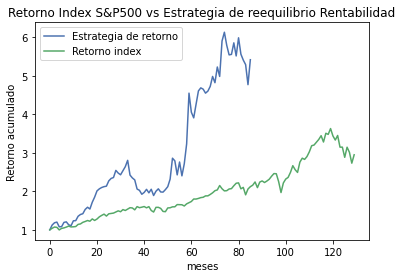

In [1207]:
rebalanced_portfolio = portfolio(stock_returns, 5, 2) # Llame a la función de cartera para aplicar la estrategia de reequilibrio en nuestros datos de acciones dados. El segundo parámetro, 5, indica el número de valores que deseamos mantener en nuestra cartera mensual. El tercer parámetro, 2, se refiere al número de valores con peores resultados que deseamos eliminar de nuestra cartera.

print("Rendimiento de la cartera reequilibrada") # Llame a las funciones de indicadores clave de rendimiento pertinentes (cagr, sharpe_ratio, maximum_drawdown) para implementar la evaluación del rendimiento en los rendimientos mensuales de nuestra estrategia de reequilibrio y mostrar los resultados.
print("CAGR: " + str(CAGR(rebalanced_portfolio)))
print("Sharpe Ratio: " + str(sharpe_ratio(rebalanced_portfolio, 0.03)))
print("Max Drawdown: " + str(maximum_drawdown(rebalanced_portfolio) ))

print("\n") #para saltar 1 espacio

print("Retorno Index S&P500") # Llame a las funciones pertinentes del indicador clave de rendimiento (cagr, sharpe_ratio, maximum_drawdown) para implementar la evaluación del rendimiento en los rendimientos mensuales de simplemente comprar y mantener el índice S&P 500 y mostrar los resultados.
print("CAGR: " + str(CAGR(sp500)))
print("Sharpe Ratio: " + str(sharpe_ratio(sp500, 0.03)))
print("Max Drawdown: " + str(maximum_drawdown(sp500) ))

fig, ax = plt.subplots() # Cree un gráfico para mostrar los rendimientos mensuales acumulados de nuestra estrategia de reequilibrio y del índice S&P 500 a lo largo de los meses.
plt.plot((1+portfolio(stock_returns, 5, 2)).cumprod())
plt.plot((1+sp500["monthly_returns"].reset_index(drop=True)).cumprod())
plt.title("Retorno Index S&P500 vs Estrategia de reequilibrio Rentabilidad")
plt.ylabel("Retorno acumulado")
plt.xlabel("meses")
ax.legend(["Estrategia de retorno","Retorno index"])

- A partir de los resultados anteriores, podemos observar que nuestra estrategia de reequilibrio supera al índice S&P 500, por tanto es efectiva. La CAGR y el ratio de Sharpe de la estrategia de reequilibrio muestran una gran rentabilidad positiva a lo largo del tiempo. La reducción máxima también es inferior a la del índice S&P 500.

## 5) Opcional **Backtesting II**

- Descargamos recomendaciones

In [1205]:
def recomendations(stock):

    pf = pd.DataFrame()
    stock = yf.Ticker(stock)
    target = stock.recommendations
        
    return target

- Creamos y llamamos a la funcion y nos entrega un dataframe con lo solicitado

In [1206]:
stocks_final = recomendations("TSLA")
stocks_final

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-16 07:42:00,JP Morgan,Overweight,,main
2012-02-16 13:53:00,Wunderlich,Hold,,down
2012-02-17 06:17:00,Oxen Group,Buy,,init
2012-03-26 07:31:00,Wunderlich,Buy,,up
2012-05-22 05:57:00,Maxim Group,Buy,,init
...,...,...,...,...
2022-10-20 13:26:44,Mizuho,Buy,,main
2022-10-25 12:50:21,Morgan Stanley,Overweight,,main
2022-11-23 11:21:03,Citigroup,Neutral,Sell,up


- Reemplace las recomendaciones positivas (ej. ’Overweight’, ’Outperform’) por 1, las neutras (ej. ’Equal-weight’, ’Hold’) por 0, y las negativas (Sell, Underperform) por -1

- Opcion 1) Utilizamos funcion **Lambda** para generar funciones anonimas y mas eficientes, la cual nos ayudara a recorrer el dataframe e ir haciendo los cambios segun la condicion.

In [1187]:
stocks_final['To Grade'] = stocks_final['To Grade'].map(lambda x : 1 if stocks_final['To Grade'] == 'Overweight' | 'Outperform'(0 if stocks_final['To Grade'] == 'Equal-weight' | 'Hold' else -1))

- Opcion 2) Utilizamos un **bucle** for para iterar sobre el dataframe y dentro usamos if para generar las condiciones de cambio

In [1188]:
for grade in stocks_final:
    
    if stocks_final['To Grade'] == 'Overweight' | 'Outperform':
        stocks_final['To Grade'] = 1
    
    elif stocks_final['To Grade'] == 'Equal-weight' | 'Hold':
        stocks_final['To Grade'] = 0
    
    else:
        stocks_final['To Grade'] = -1